In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Display all columns
pd.set_option('display.max_columns', None)

# Display all rows
pd.set_option('display.max_rows', None)

## ▶️ Data Cleaning:

In [3]:
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print('Shape:', df.shape, f'| Rows: {df.shape[0]}, Columns: {df.shape[1]}')

Shape: (1460, 81) | Rows: 1460, Columns: 81


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

dtype assignment looks good!

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


large variation across numerical columns - needs standarization!

#### Check duplicates:

In [8]:
df.duplicated().sum()

0

no duplicates!

#### Check missing data:

In [9]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [10]:
features_with_null = [feature for feature in df.columns if df[feature].isnull().sum() > 1]
print('These are all the features (columns) with missing values (in %): \n')

percent_missing = {}
for feature in features_with_null:
    percent_missing_feature = round(100*df[feature].isnull().sum()/len(df), 2)
    percent_missing[feature] = percent_missing_feature

print(json.dumps(percent_missing, indent=4))

These are all the features (columns) with missing values (in %): 

{
    "LotFrontage": 17.74,
    "Alley": 93.77,
    "MasVnrType": 59.73,
    "MasVnrArea": 0.55,
    "BsmtQual": 2.53,
    "BsmtCond": 2.53,
    "BsmtExposure": 2.6,
    "BsmtFinType1": 2.53,
    "BsmtFinType2": 2.6,
    "FireplaceQu": 47.26,
    "GarageType": 5.55,
    "GarageYrBlt": 5.55,
    "GarageFinish": 5.55,
    "GarageQual": 5.55,
    "GarageCond": 5.55,
    "PoolQC": 99.52,
    "Fence": 80.75,
    "MiscFeature": 96.3
}


In [11]:
print(f'Total features with missing data: {len(features_with_null)}')

Total features with missing data: 18


There are null values! and a lot! Let's check how the missing values relate to tagetCol - `SalesPrice`:

In [12]:
dataset = df.copy()

# Making feature_value=1 if it is null, else 0
for feature in features_with_null:
    dataset[feature] = np.where(dataset[feature].isnull(), 1, 0)

Variation of median sale price where data is missing (1) v/s where data is present (0): 



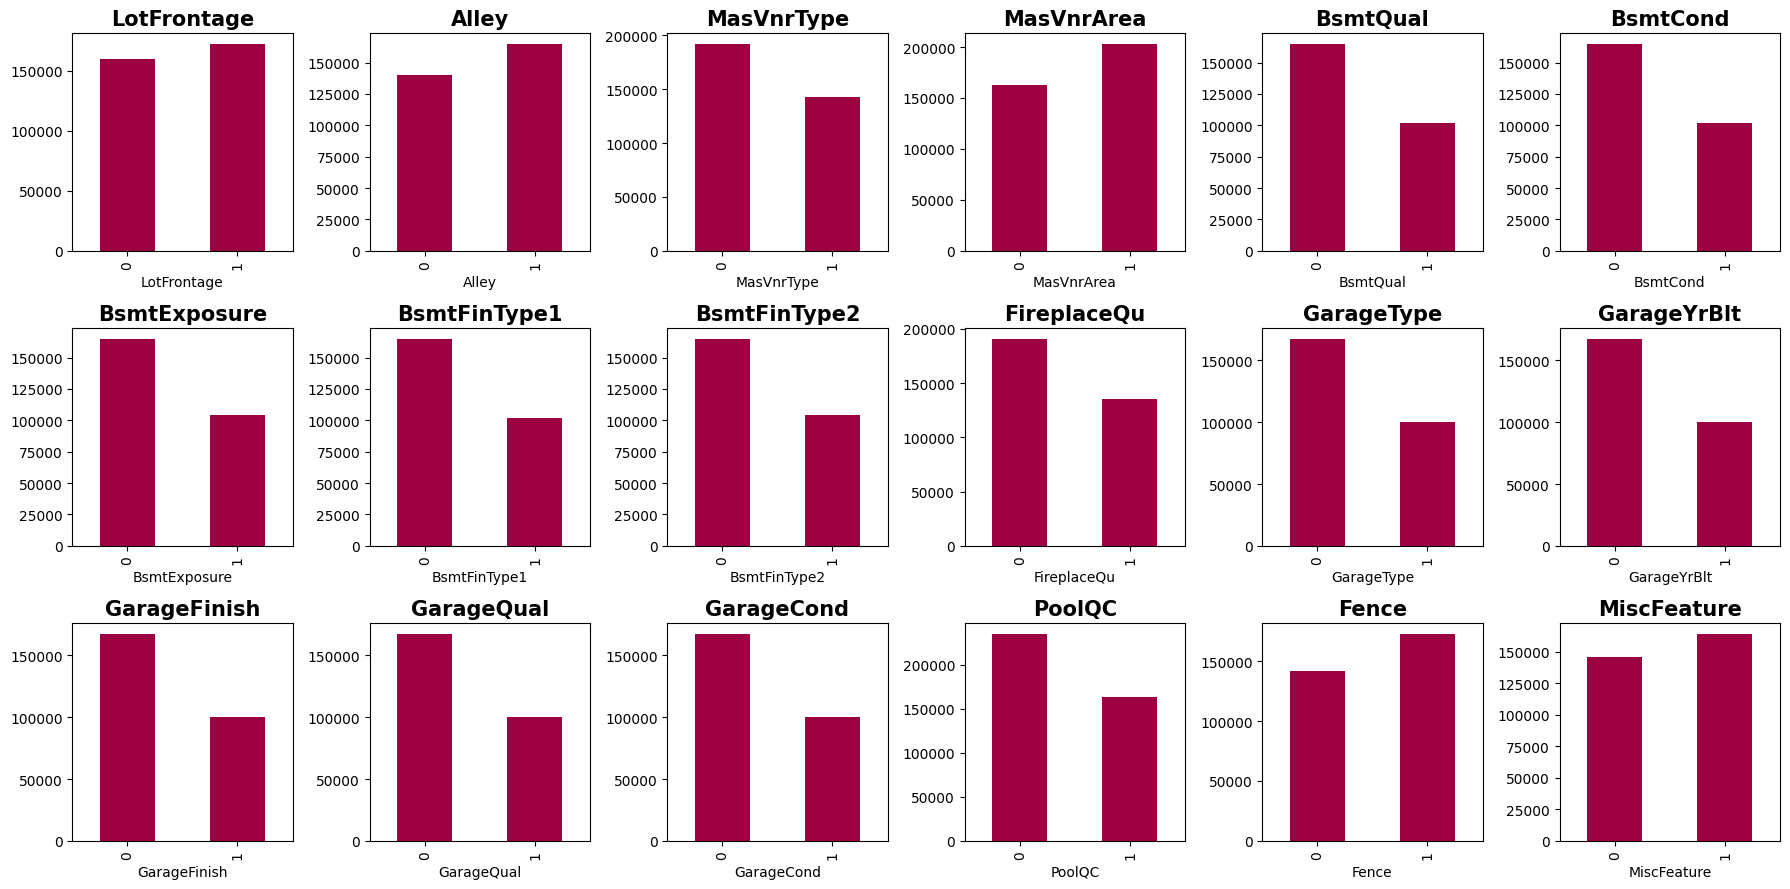

In [13]:
print('Variation of median sale price where data is missing (1) v/s where data is present (0): \n')
fig, axis = plt.subplots(3,6, figsize=(18,9))

for i, ax in enumerate(axis.flatten()):
    if i < len(features_with_null):
        dataset.groupby(features_with_null[i])['SalePrice'].median().plot.bar(ax=ax, cmap='Spectral')
        ax.set_title(features_with_null[i], fontsize=15, fontweight='bold') 
plt.tight_layout()
plt.show()

Let's check percentge missing across all columns above a certain threshold value:

In [14]:
# Return all columns where data is missing more than the threshols limit (40%)

def large_perecntage_missing(df, threshold=40):
    missing = {}
    for column in list(df.columns):
        percent_missing = round(100*df[column].isnull().sum()/len(df), 2)
        if percent_missing >= threshold:
            missing[column] = percent_missing
    
    return json.dumps(missing, indent=4)

In [15]:
missing_more_than_threshold = large_perecntage_missing(df)
print('These are the columns where data is missing in more than 40% of the line times: \n', missing_more_than_threshold)

These are the columns where data is missing in more than 40% of the line times: 
 {
    "Alley": 93.77,
    "MasVnrType": 59.73,
    "FireplaceQu": 47.26,
    "PoolQC": 99.52,
    "Fence": 80.75,
    "MiscFeature": 96.3
}


the above columns are missing data on a lot of line items, it's better to drop these columns.

In [16]:
df = df.drop(["Alley", "MasVnrType", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"], axis=1)

In [17]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [18]:
print('Shape:', df.shape, f'| Rows: {df.shape[0]}, Columns: {df.shape[1]}')

Shape: (1460, 75) | Rows: 1460, Columns: 75


let's check the columns where data is missing, and try to fill them with appropriate values.

In [19]:
# Return all columns where data is missing (in acsending order of missing percentage)

def still_missing(df):
    missing = {}
    for column in list(df.columns):
        percent_missing = round(100*df[column].isnull().sum()/len(df), 2)
        if percent_missing > 0:
            missing[column] = [percent_missing, df[column].dtype, df[column].nunique()]
    sorted_by_values = sorted(missing.items(), key= lambda x:x[1])
    sorted_dict = {kv[0]:kv[1] for kv in sorted_by_values}
    
    return sorted_dict

These are the features where data is missing (% missing data), dtype of the feature and unique_values in it:

In [20]:
for column, info in still_missing(df).items():
    print(f'Column: {column} \n\t % missinng data: {info[0]} | dtype: {info[1]} | unique_values: {info[2]}\n')

Column: Electrical 
	 % missinng data: 0.07 | dtype: object | unique_values: 5

Column: MasVnrArea 
	 % missinng data: 0.55 | dtype: float64 | unique_values: 327

Column: BsmtQual 
	 % missinng data: 2.53 | dtype: object | unique_values: 4

Column: BsmtCond 
	 % missinng data: 2.53 | dtype: object | unique_values: 4

Column: BsmtFinType1 
	 % missinng data: 2.53 | dtype: object | unique_values: 6

Column: BsmtExposure 
	 % missinng data: 2.6 | dtype: object | unique_values: 4

Column: BsmtFinType2 
	 % missinng data: 2.6 | dtype: object | unique_values: 6

Column: GarageYrBlt 
	 % missinng data: 5.55 | dtype: float64 | unique_values: 97

Column: GarageFinish 
	 % missinng data: 5.55 | dtype: object | unique_values: 3

Column: GarageQual 
	 % missinng data: 5.55 | dtype: object | unique_values: 5

Column: GarageCond 
	 % missinng data: 5.55 | dtype: object | unique_values: 5

Column: GarageType 
	 % missinng data: 5.55 | dtype: object | unique_values: 6

Column: LotFrontage 
	 % missinn

let's fill the missing values:

For **`categorical columns`**, let's fill the rows will correspondoing **`mode`** values:

In [21]:
for column, info in still_missing(df).items():
    if info[1] == 'object':
        df[column] = df[column].fillna(df[column].mode()[0])

what's still left?

In [22]:
for column, info in still_missing(df).items():
    print(f'Column: {column} \n\t % missing data: {info[0]} | dtype: {info[1]} | unique_values: {info[2]}\n')

Column: MasVnrArea 
	 % missing data: 0.55 | dtype: float64 | unique_values: 327

Column: GarageYrBlt 
	 % missing data: 5.55 | dtype: float64 | unique_values: 97

Column: LotFrontage 
	 % missing data: 17.74 | dtype: float64 | unique_values: 110



`MasVnrArea` and `GarageYrBlt` is missing in small numbers. Let's fill it with median. (Why Median? There are outliers - See EDA section)

In [23]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())

In [24]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())

In [25]:
for column, info in still_missing(df).items():
    print(f'Column: {column} \n\t % missing data: {info[0]} | dtype: {info[1]} | unique_values: {info[2]}\n')

Column: LotFrontage 
	 % missing data: 17.74 | dtype: float64 | unique_values: 110



for filling **`LotFrontage`**, it's better to look at the correletion with other independent (non-target) columns as it is missing in larger numbers:

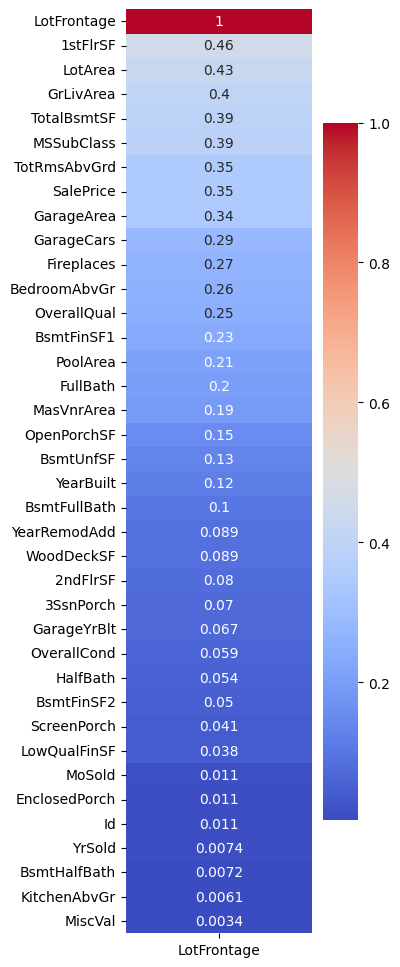

In [26]:
plt.figure(figsize=(3,12))
sns.heatmap(abs(df.corr(numeric_only=True)[['LotFrontage']]).sort_values(by='LotFrontage', ascending=False), cmap='coolwarm', annot=True)
plt.show()

The goal is to fill null values with median value (for the particular category) of the feature, which is highly corelated ``and have less unique values``.

**`LotFrontage`** is highly corelated to - **`MSSubClass`** which have relativelty less unique values. Let's fill values for `LotFrontage` by making use of `MSSubClass`:

In [27]:
print('Unique values in MSSubClass:', sorted(df['MSSubClass'].unique()))

Unique values in MSSubClass: [20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 160, 180, 190]


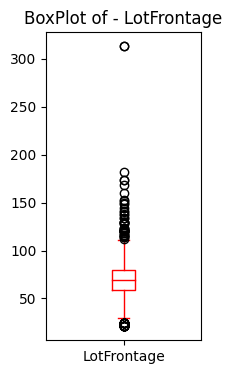

In [28]:
plt.figure(figsize=(2,4))
df['LotFrontage'].plot(kind='box', color='r')
plt.title('BoxPlot of - LotFrontage')
plt.show()

There are outliers in `LotFrontage` so it's better to fill missing values with median.

In [29]:
def fill_lotfrontage(cols):
    LotFrontage = cols[0]
    MSSubClass = cols[1]
    
    if pd.isnull(LotFrontage):
        if MSSubClass == 20:
            return float(df[df['MSSubClass'] == 20]['LotFrontage'].median())
        elif MSSubClass == 30:
            return float(df[df['MSSubClass'] == 30]['LotFrontage'].median())
        elif MSSubClass == 40:
            return float(df[df['MSSubClass'] == 40]['LotFrontage'].median())
        elif MSSubClass == 45:
            return float(df[df['MSSubClass'] == 45]['LotFrontage'].median())
        elif MSSubClass == 50:
            return float(df[df['MSSubClass'] == 50]['LotFrontage'].median())
        elif MSSubClass == 60:
            return float(df[df['MSSubClass'] == 60]['LotFrontage'].median())
        elif MSSubClass == 70:
            return float(df[df['MSSubClass'] == 70]['LotFrontage'].median())
        elif MSSubClass == 75:
            return float(df[df['MSSubClass'] == 75]['LotFrontage'].median())
        elif MSSubClass == 80:
            return float(df[df['MSSubClass'] == 80]['LotFrontage'].median())
        elif MSSubClass == 85:
            return float(df[df['MSSubClass'] == 85]['LotFrontage'].median())
        elif MSSubClass == 90:
            return float(df[df['MSSubClass'] == 90]['LotFrontage'].median())
        elif MSSubClass == 120:
            return float(df[df['MSSubClass'] == 120]['LotFrontage'].median())
        elif MSSubClass == 160:
            return float(df[df['MSSubClass'] == 160]['LotFrontage'].median())
        elif MSSubClass == 180:
            return float(df[df['MSSubClass'] == 180]['LotFrontage'].median())
        else:
            return float(df[df['MSSubClass'] == 190]['LotFrontage'].median())
    else:
        return LotFrontage

In [30]:
df['LotFrontage'] = df[['LotFrontage', 'MSSubClass']].apply(fill_lotfrontage, axis=1)

In [31]:
still_missing(df)

{}

All good now!

## ▶️ EDA:

Let's quickly see how the target feature data is distributed:

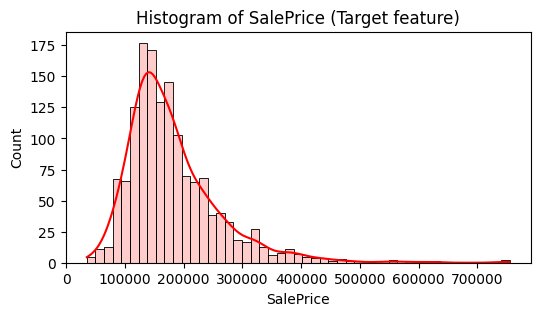

In [32]:
plt.figure(figsize=(6,3))
sns.histplot(df['SalePrice'], kde=True, color='r', alpha=0.2)
plt.title('Histogram of SalePrice (Target feature)')
plt.show()

Hmhh! Right-skewed. np.log maybe!

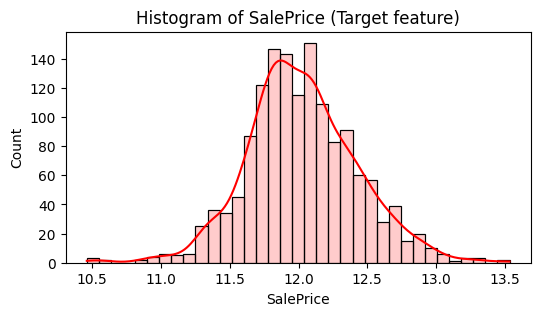

In [33]:
plt.figure(figsize=(6,3))
sns.histplot(np.log(df['SalePrice']), kde=True, color='r', alpha=0.2)
plt.title('Histogram of SalePrice (Target feature)')
plt.show()

Looks Normal!

In [34]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [35]:
all_dependent_columns = list(df.columns)
all_dependent_columns.remove('Id') # Remove unwanted column
all_dependent_columns.remove('SalePrice') # Remove independent column
all_dependent_columns

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch'

In [36]:
df[all_dependent_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [37]:
# All numerical columns
num_columns = [col for col in all_dependent_columns if df[col].dtype != 'O']
num_columns.remove('MSSubClass') # Categorical 
num_columns.remove('OverallQual') # Categorical - Ordinal
num_columns.remove('OverallCond') # Categorical - Ordinal
print(f'>> Numerical Columns (count: {len(num_columns)}): \n', num_columns)

# All categorical columns
cat_columns = [col for col in all_dependent_columns if col not in num_columns]
print(f'>> Categorical Columns (count: {len(cat_columns)}): \n', cat_columns)

>> Numerical Columns (count: 33): 
 ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
>> Categorical Columns (count: 40): 
 ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'Gar

**Further dividing num_columns into:**
1. num_temporal (Year features)
2. num_discrete
3. num_continuous

In [38]:
num_temporal_columns = [col for col in num_columns if 'Yr' in col or 'Year' in col]
print(f'>> Numerical - Temporal/Datetime features (count: {len(num_temporal_columns)}): \n', num_temporal_columns)

>> Numerical - Temporal/Datetime features (count: 4): 
 ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [39]:
num_discrete_columns = [col for col in num_columns if len(df[col].unique())<25 and col not in num_temporal_columns]
print(f'>> Numerical - Discrete features (count: {len(num_discrete_columns)}): \n', num_discrete_columns)

>> Numerical - Discrete features (count: 14): 
 ['LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']


In [40]:
num_continuous_columns = [col for col in num_columns if col not in num_temporal_columns+num_discrete_columns]
print(f'>> Numerical - Continuous features (count: {len(num_continuous_columns)}): \n', num_discrete_columns)

>> Numerical - Continuous features (count: 15): 
 ['LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']


In [41]:
for col in cat_columns:
    print(f'>> Unique categories in {col}: \n\t', sorted(df[col].unique()))

>> Unique categories in MSSubClass: 
	 [20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 160, 180, 190]
>> Unique categories in MSZoning: 
	 ['C (all)', 'FV', 'RH', 'RL', 'RM']
>> Unique categories in Street: 
	 ['Grvl', 'Pave']
>> Unique categories in LotShape: 
	 ['IR1', 'IR2', 'IR3', 'Reg']
>> Unique categories in LandContour: 
	 ['Bnk', 'HLS', 'Low', 'Lvl']
>> Unique categories in Utilities: 
	 ['AllPub', 'NoSeWa']
>> Unique categories in LotConfig: 
	 ['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside']
>> Unique categories in LandSlope: 
	 ['Gtl', 'Mod', 'Sev']
>> Unique categories in Neighborhood: 
	 ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker']
>> Unique categories in Condition1: 
	 ['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe', 'RRNn']
>> Unique 

#### Categorical features:

There are many categorical columns. **Let's check how mean sale price is varying across each category in a categorical feature:**

In [42]:
def get_central_sale_price(df, cat_columns, centrality):
    central_sale_price_combined = {}
    
    for col in cat_columns:
        central_sale_prices = {}
        
        types = list(df[col].unique())
        for a_type in types:
            if centrality == 'mean':
                central_sale_price = df[df[col] == a_type]['SalePrice'].mean()
                central_sale_prices[a_type] = central_sale_price
            elif centrality == 'median':
                central_sale_price = df[df[col] == a_type]['SalePrice'].median()
                central_sale_prices[a_type] = central_sale_price    
        sorted_items = sorted(central_sale_prices.items())
        central_sale_prices = dict(sorted_items)
        
        central_sale_price_combined[col] = central_sale_prices
    
    return central_sale_price_combined

In [43]:
mean_sale_prices = get_central_sale_price(df, cat_columns, centrality='mean')

In [44]:
median_sale_prices = get_central_sale_price(df, cat_columns, centrality='median')

Variation of median sale price across each category in a feature: 



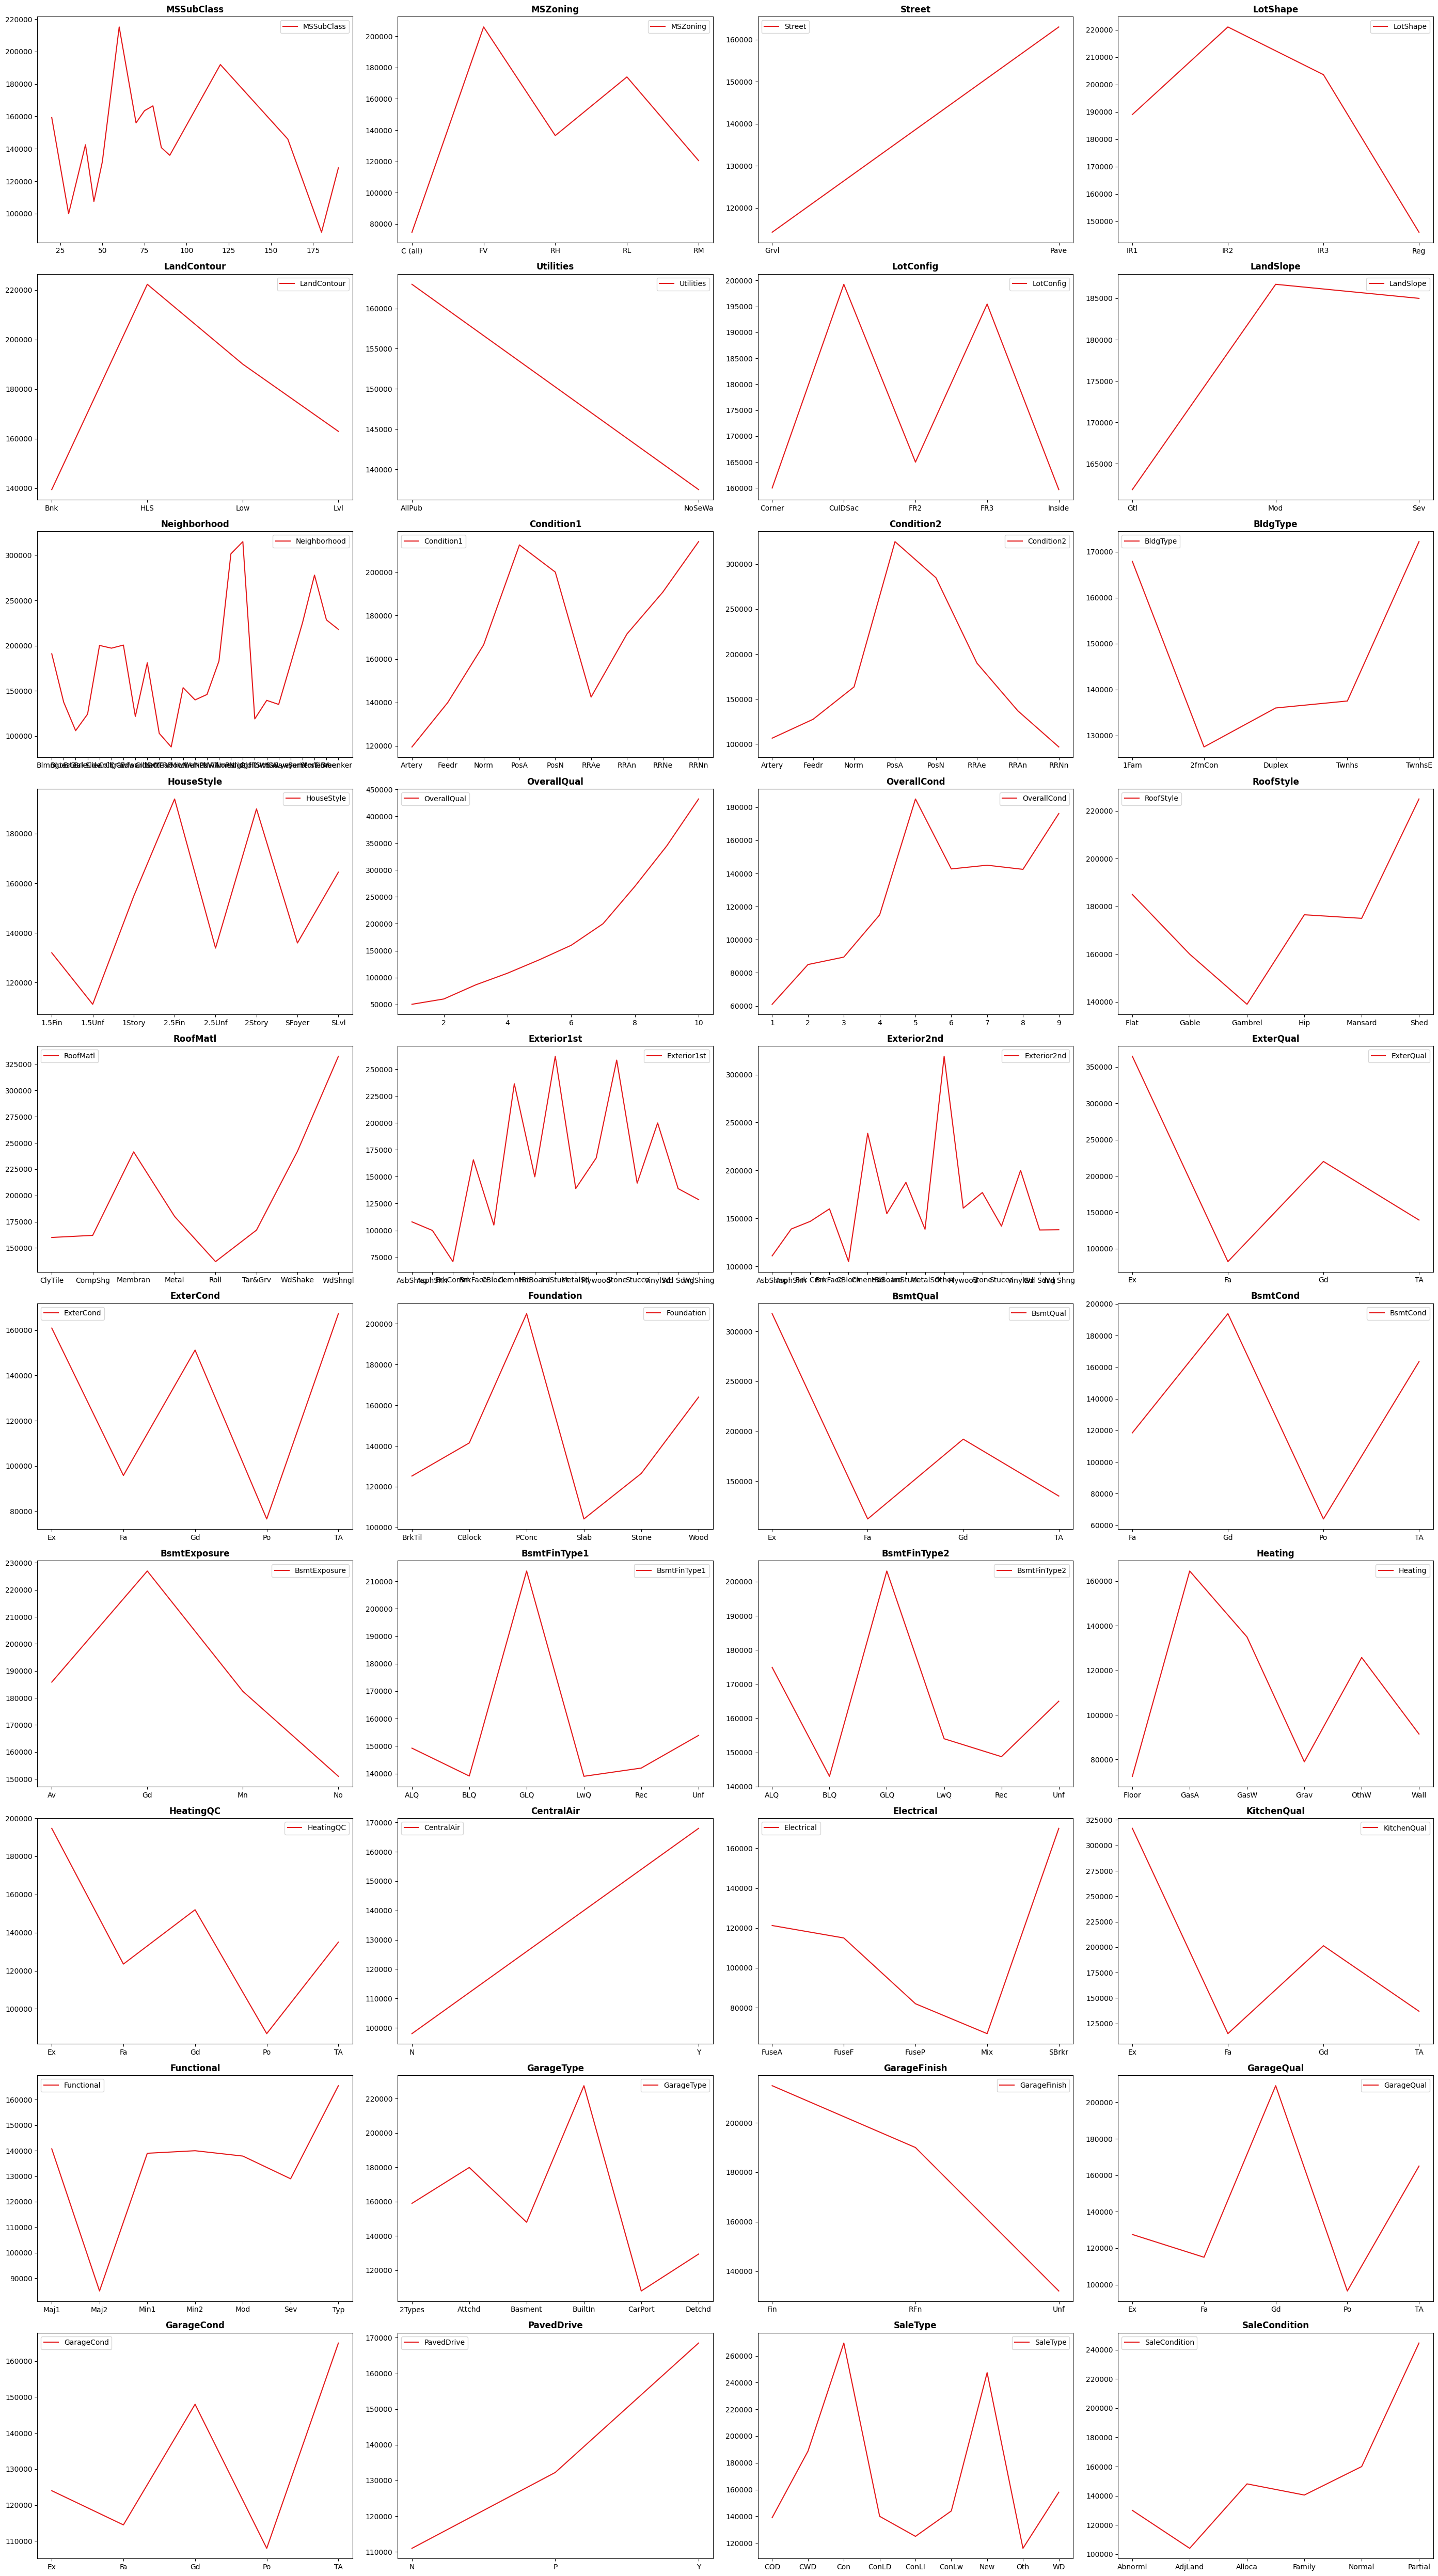

In [45]:
print('Variation of median sale price across each category in a feature: \n')
fig, axis = plt.subplots(10,4, figsize=(28,50))

all_cols = list(median_sale_prices.keys())
for i, ax in enumerate(axis.flatten()):
    if i < len(median_sale_prices.keys()):
        median_price_df = pd.DataFrame.from_dict(median_sale_prices[all_cols[i]], orient='index', columns=[all_cols[i]])
        sns.lineplot(data=median_price_df, ax=ax, palette='Set1')
        ax.set_title(all_cols[i], fontsize=12, fontweight='bold') 
plt.tight_layout()
plt.show()

#### Numerical features:

##### Continuous:

BoxPlot for each numerical (continuous) feature: 



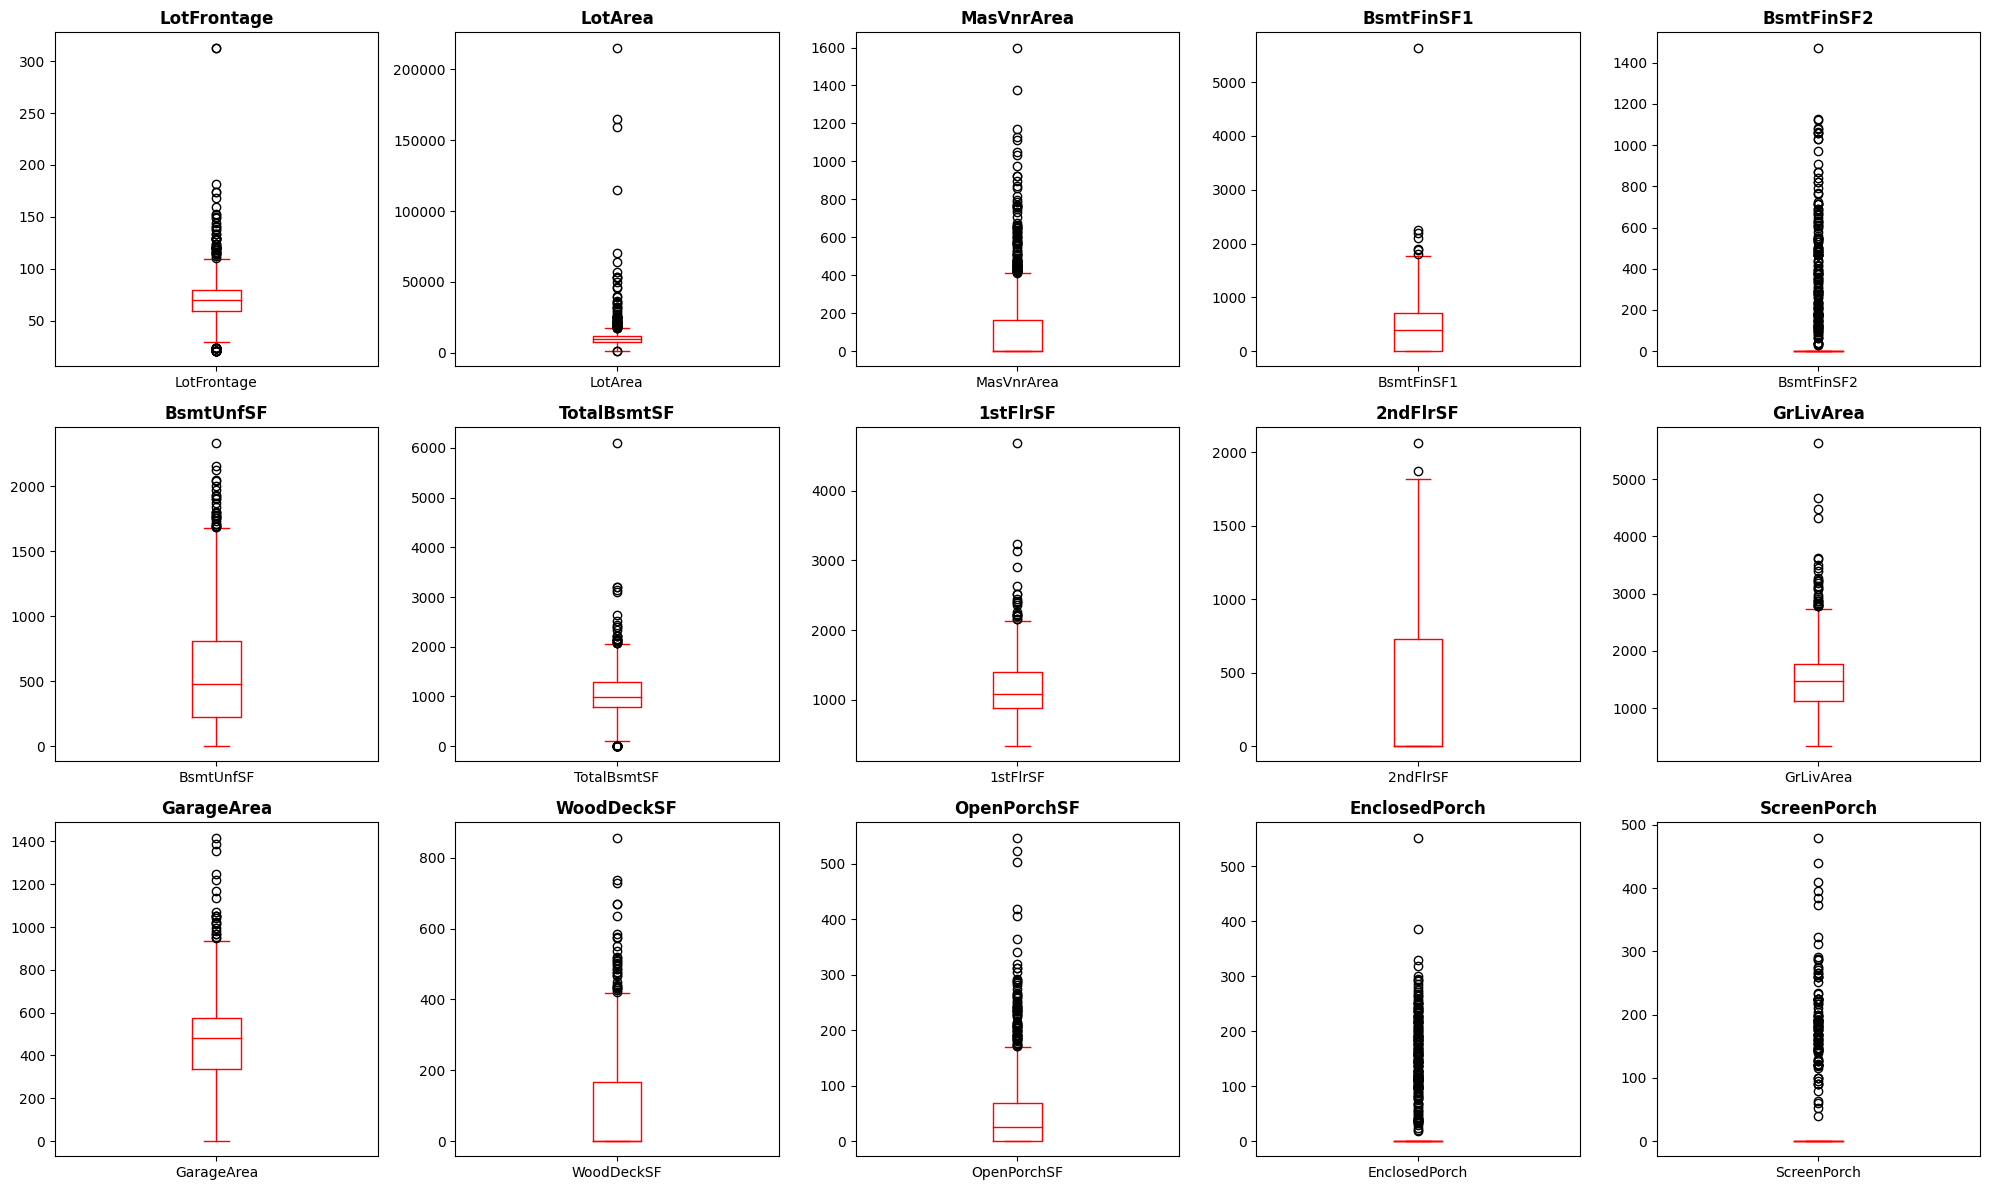

In [46]:
print('BoxPlot for each numerical (continuous) feature: \n')
fig, axis = plt.subplots(3,5, figsize=(20, 12))

for i, ax in enumerate(axis.flatten()):
    if i < len(num_continuous_columns):
        df[num_continuous_columns[i]].plot(kind='box', ax=ax, color='red')
        ax.set_title(num_continuous_columns[i], fontsize=12, fontweight='bold') 
plt.tight_layout()
plt.show()

All have outliers!

Distplot for each numerical (continuous) feature: 



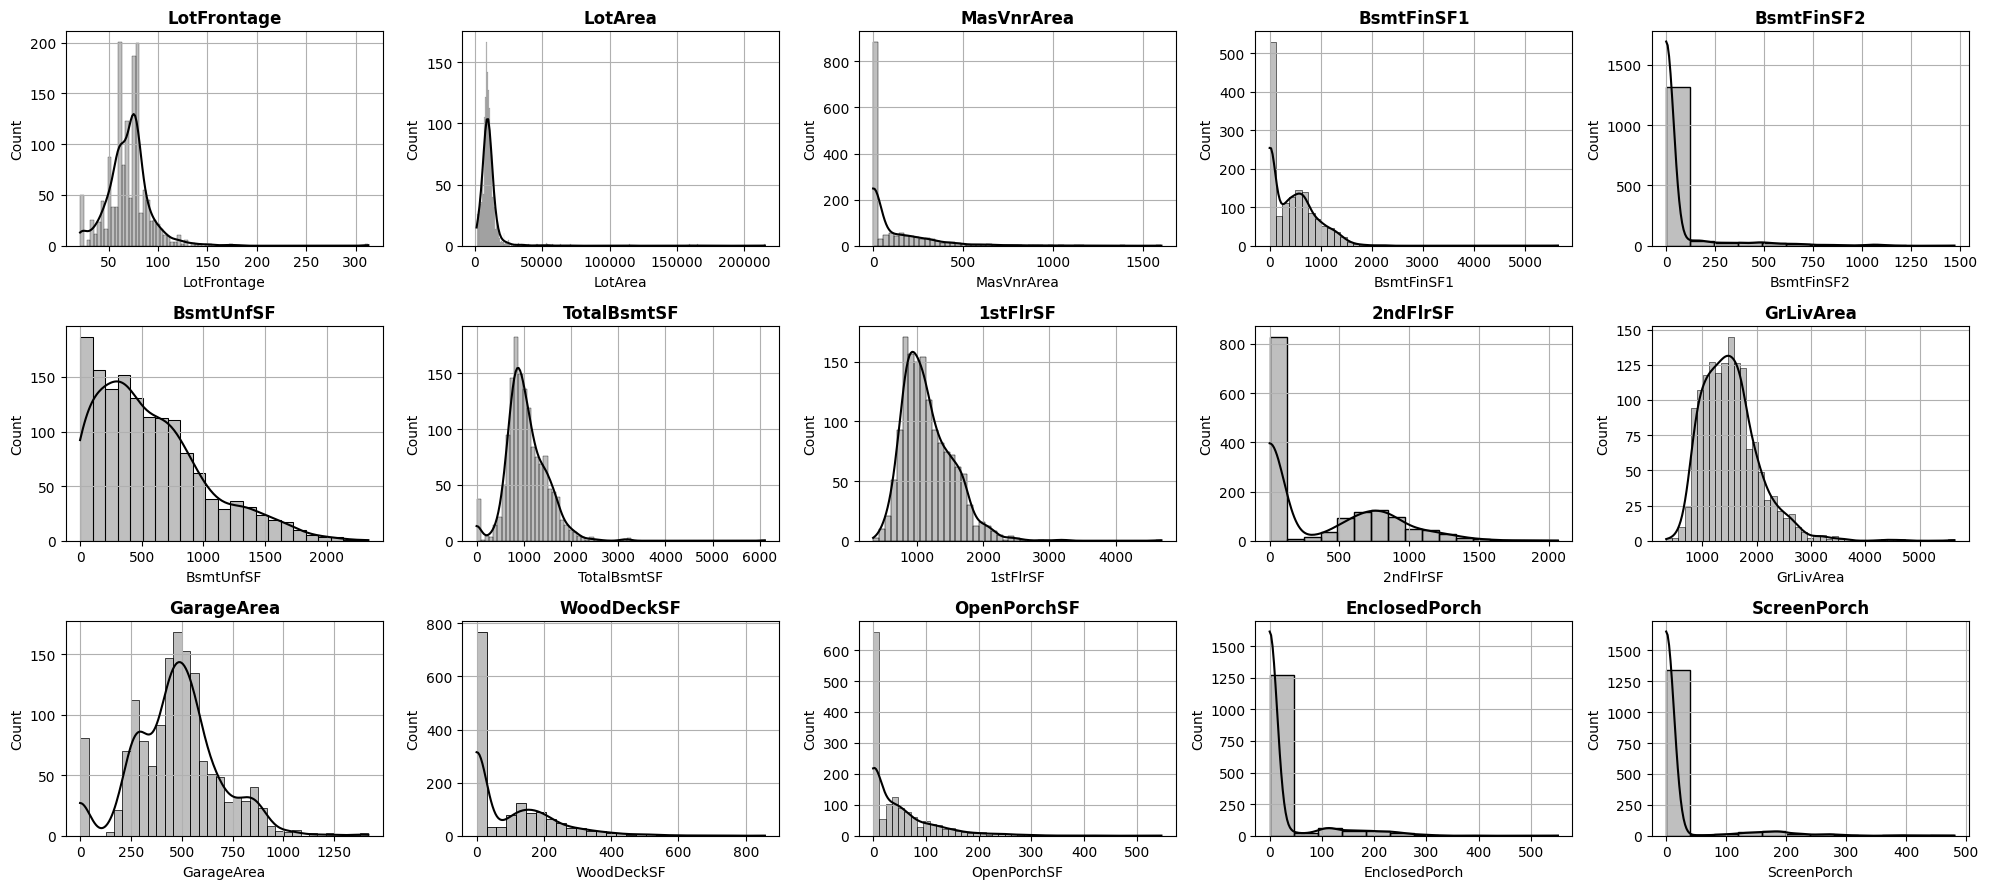

In [47]:
print('Distplot for each numerical (continuous) feature: \n')
fig, axis = plt.subplots(3,5, figsize=(20, 9))

for i, ax in enumerate(axis.flatten()):
    if i < len(num_continuous_columns):
        sns.histplot(df[num_continuous_columns[i]], ax=ax, kde=True, color='k', alpha=0.25)
        ax.set_title(num_continuous_columns[i], fontsize=12, fontweight='bold') 
        ax.grid(True)
plt.tight_layout()
plt.show()

Only few looks like normally distributed! - (Right Skewed). Need to apply transformation. np.log (maybe)!

Distplot for each numerical (continuous) feature: 



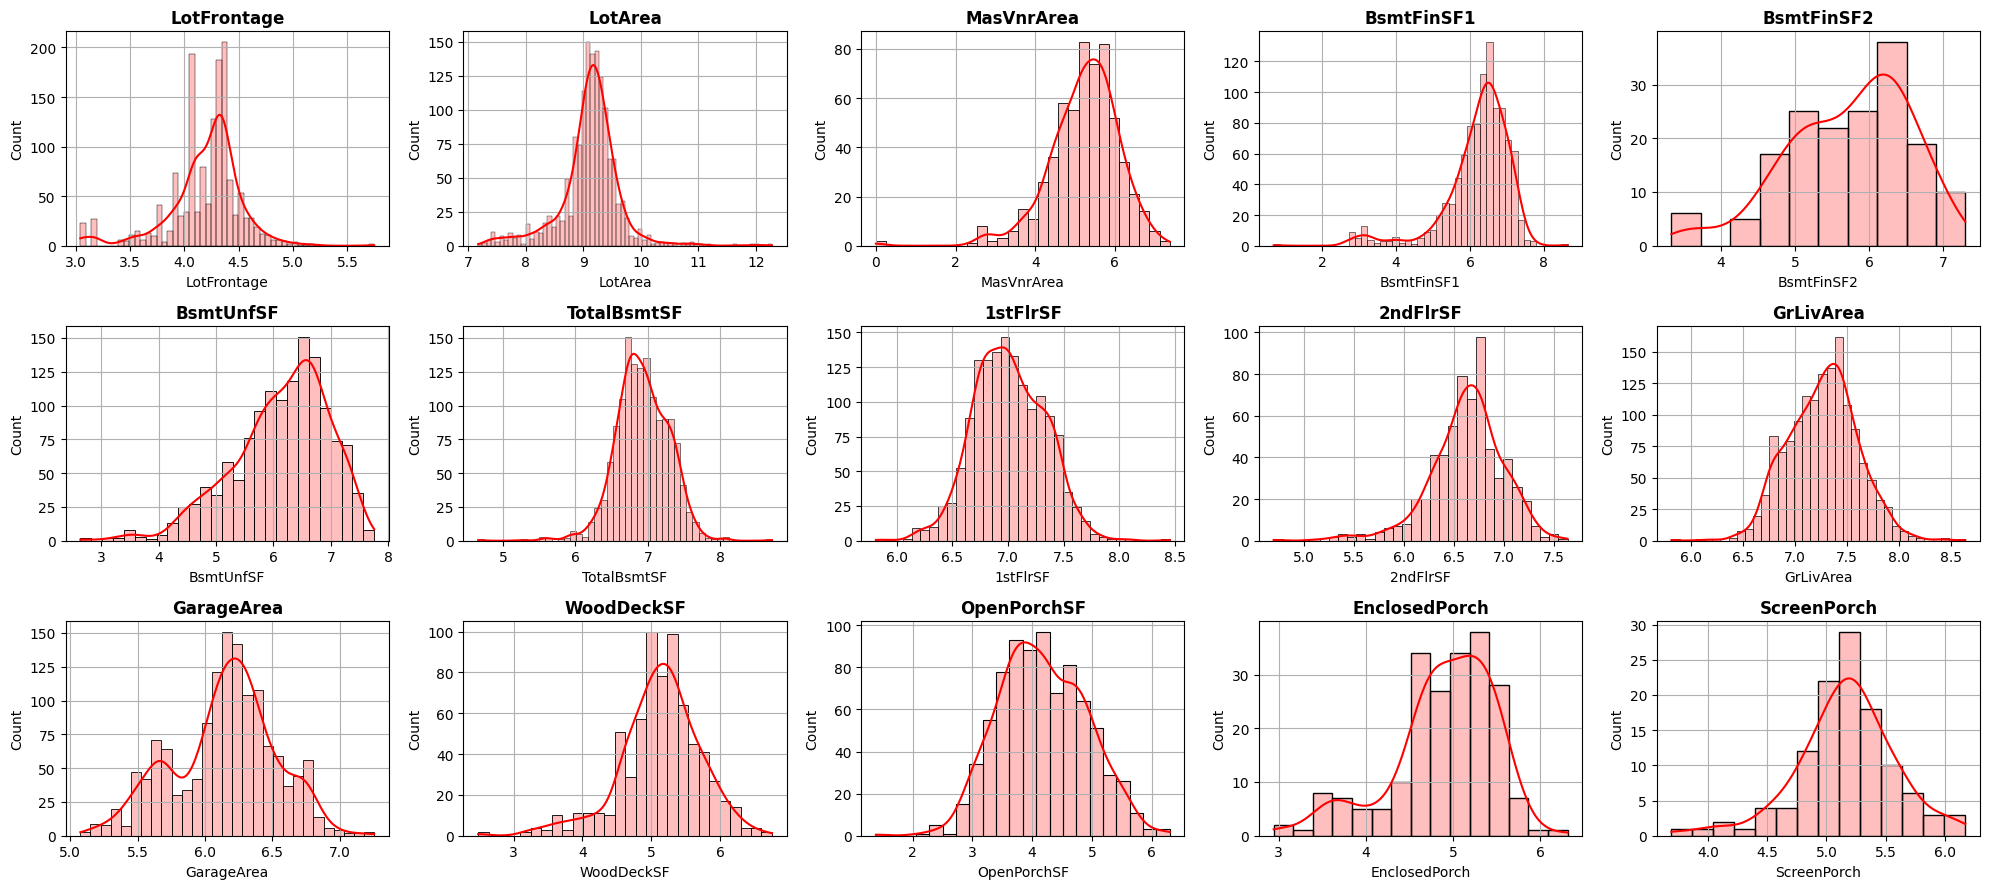

In [48]:
print('Distplot for each numerical (continuous) feature: \n')
fig, axis = plt.subplots(3,5, figsize=(20, 9))

for i, ax in enumerate(axis.flatten()):
    if i < len(num_continuous_columns):
        sns.histplot(np.log(df[num_continuous_columns[i]]), ax=ax, kde=True, color='red', alpha=0.25)
        ax.set_title(num_continuous_columns[i], fontsize=12, fontweight='bold') 
        ax.grid(True)
plt.tight_layout()
plt.show()

Yes! looks a lot better.

##### Discrete:

Variation of median sale price v/s: 



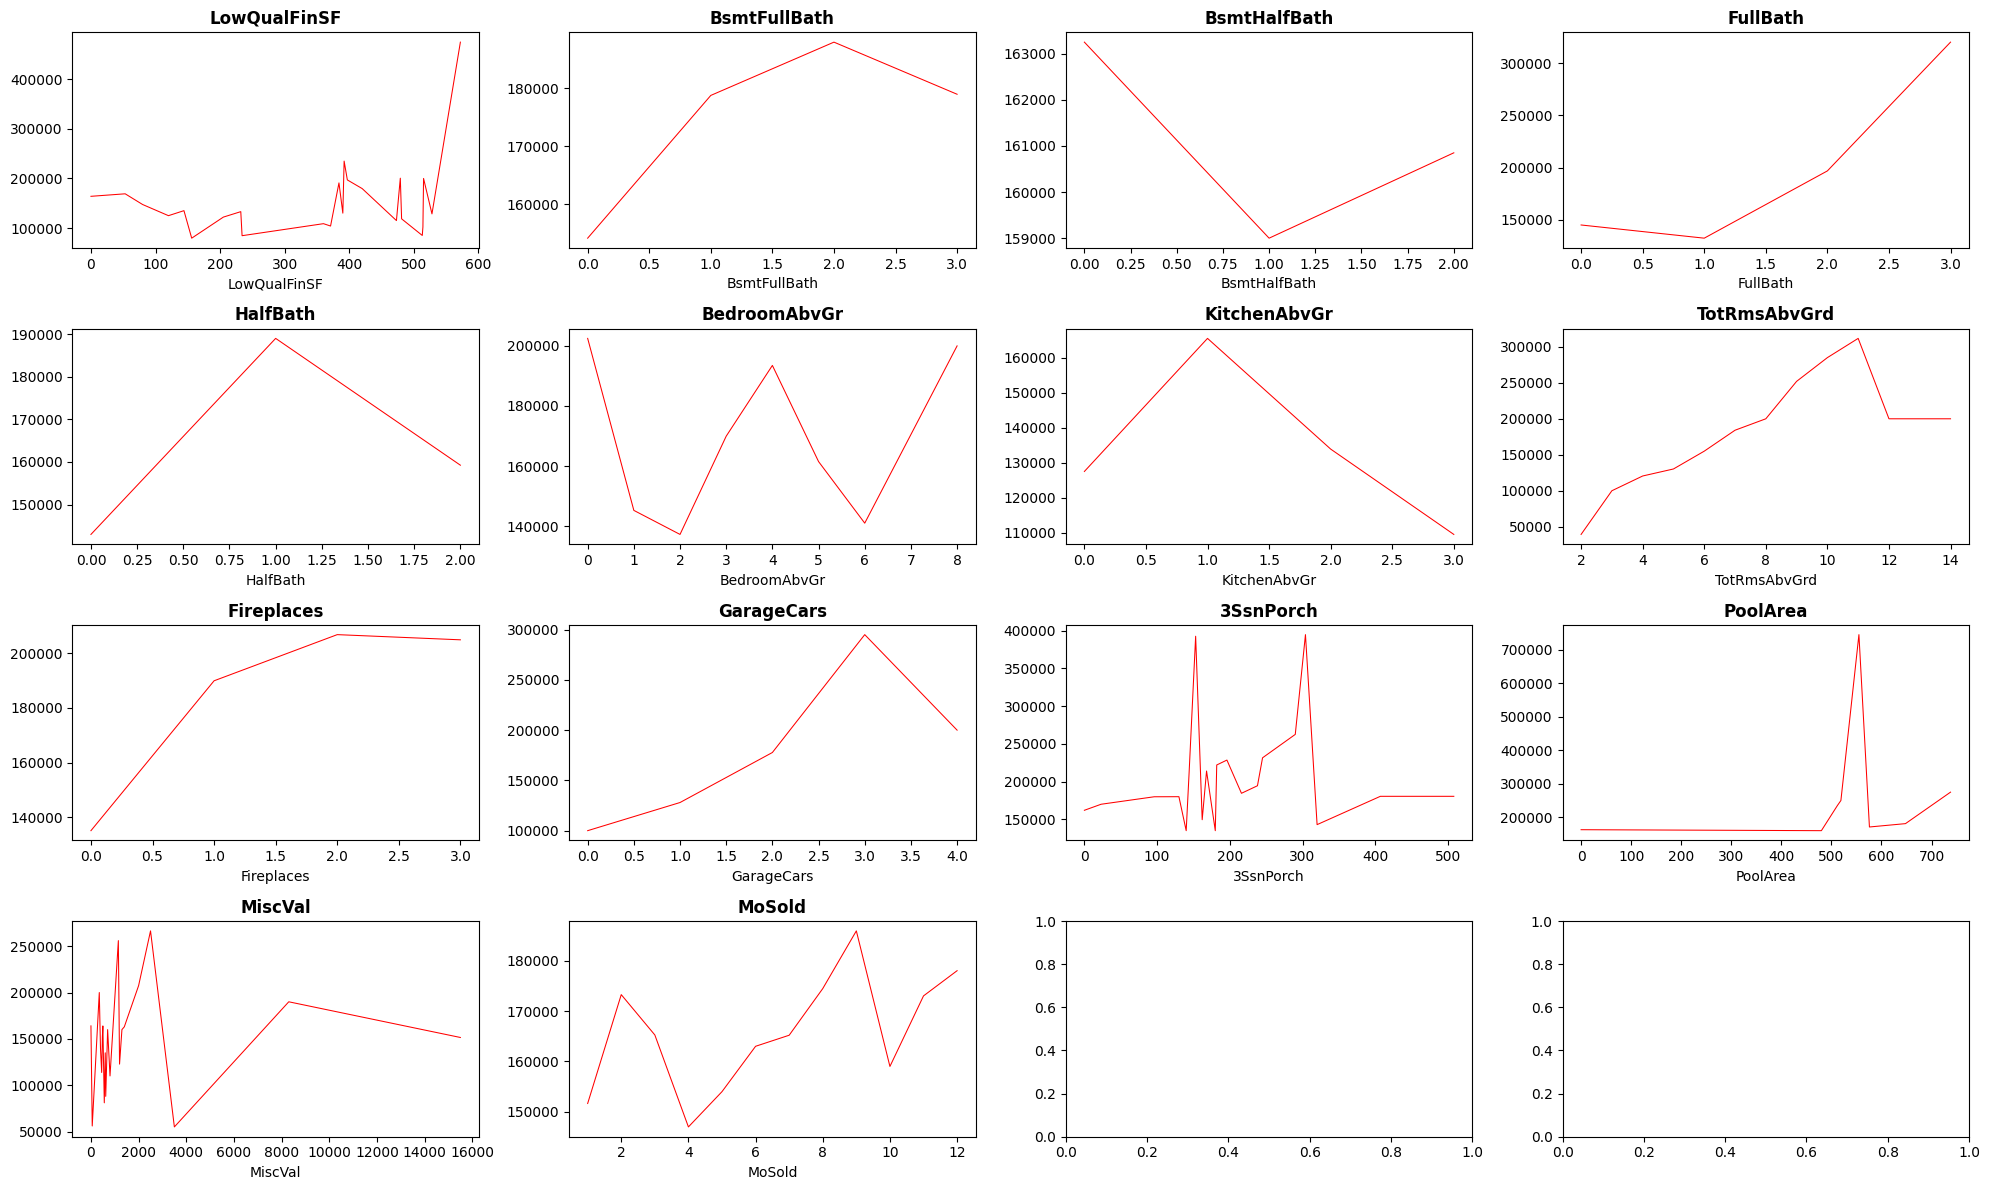

In [49]:
print('Variation of median sale price v/s: \n')
fig, axis = plt.subplots(4,4, figsize=(20,12))

for i, ax in enumerate(axis.flatten()):
    if i < len(num_discrete_columns):
        df.groupby(num_discrete_columns[i])['SalePrice'].median().plot(kind='line', ax=ax, color='r', linewidth=0.75)
        ax.set_title(num_discrete_columns[i], fontsize=12, fontweight='bold') 
plt.tight_layout()
plt.show()

>Note:  Last two are empty as we have only 14 discrete numerical variable.

##### Temporal:

Variation of median sale price v/s: 



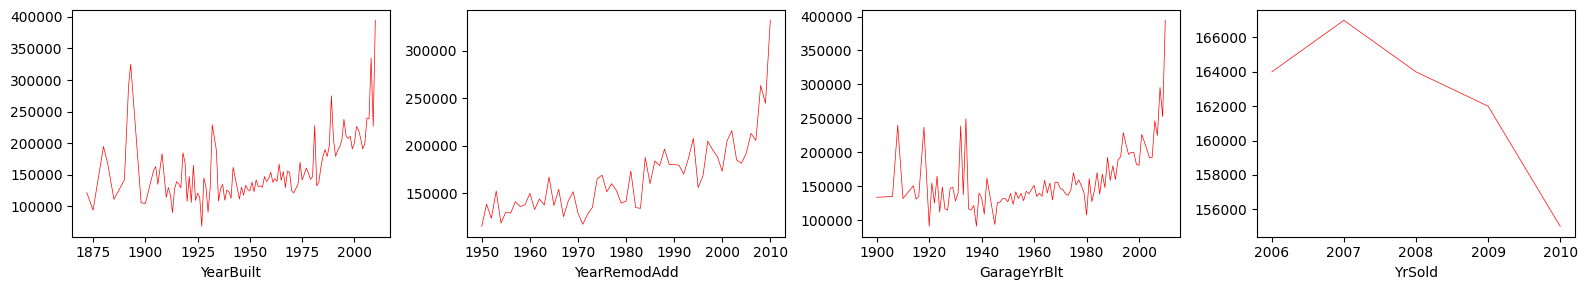

In [50]:
print('Variation of median sale price v/s: \n')
fig, axis = plt.subplots(1,4, figsize=(16,3))

for i, ax in enumerate(axis.flatten()):
    if i < len(num_temporal_columns):
        df.groupby(num_temporal_columns[i])['SalePrice'].median().plot(kind='line', ax=ax, color='r', linewidth=0.5)
plt.tight_layout()
plt.show()

## ▶️ Feature Engineering:

In [51]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


Let's enginner the **temporal_numerical features**: All yr based columns can be subtracted from the YrSold to clean it.

In [52]:
num_temporal_columns

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [53]:
for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:   
    df[feature] = df['YrSold']- df[feature]

In [54]:
df[num_temporal_columns].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,2008
1,31,31,31.0,2007
2,7,6,7.0,2008
3,91,36,8.0,2006
4,8,8,8.0,2008


As we saw above most of the continuous numerical variables are right skewed and np.log() fixes it for better. So let's do that.

In [55]:
for feature in num_continuous_columns:
    if 0 in df[feature]:
        pass
    else:
        df[feature] = np.log(df[feature])

It's better to check if there are any rare category in the categorical feature. Let's do that.

In [56]:
cat_columns

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [57]:
for feature in cat_columns:
    temp = df.groupby(feature)['SalePrice'].count()/len(df)
    temp_df = temp[temp>0.01].index
    df[feature] = np.where(df[feature].isin(temp_df), df[feature], 'is_rare')

In [58]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,is_rare,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


**Time to encode categorical features**. Let's make use of target column - **SalePrice** to do the encoding:

In [59]:
for feature in cat_columns:
    ordered_labels = df.groupby(feature)['SalePrice'].mean().sort_values().index
    ordered_labels = {label:i for i,label in enumerate(ordered_labels)}
    df[feature] = df[feature].map(ordered_labels)

In [60]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,12,3,65.0,8450,1,0,1,1,0,0,15,4,1,4,5,5,6,5,5,0,0,9,9,196.0,2,3,4,2,2,0,5,706,4,0,150,856,2,4,1,3,856,854,0,1710,1,0,2,1,3,1,2,8,4,0,3,5.0,1,2,548,1,2,2,0,61,0,0,0,0,0,2,2008,2,3,208500
1,2,9,3,80.0,9600,1,0,1,1,1,0,12,1,1,4,4,4,4,31,31,0,0,1,2,0.0,1,3,2,2,2,3,3,978,4,0,284,1262,2,4,1,3,1262,0,0,1262,0,1,2,0,3,1,1,6,4,1,3,31.0,1,2,460,1,2,2,298,0,0,0,0,0,0,5,2007,2,3,181500
2,3,12,3,68.0,11250,1,1,1,1,0,0,15,4,1,4,5,5,6,7,6,0,0,9,9,162.0,2,3,4,2,2,1,5,486,4,0,434,920,2,4,1,3,920,866,0,1786,1,0,2,1,3,1,2,6,4,1,3,7.0,1,2,608,1,2,2,0,42,0,0,0,0,0,9,2008,2,3,223500
3,4,7,3,60.0,9550,1,1,1,1,2,0,16,4,1,4,5,5,6,91,36,0,0,2,4,0.0,1,3,1,1,3,0,3,216,4,0,540,756,2,3,1,3,961,756,0,1717,1,0,1,0,3,1,2,7,4,1,1,8.0,0,3,642,1,2,2,0,35,272,0,0,0,0,2,2006,2,0,140000
4,5,12,3,84.0,14260,1,1,1,1,1,0,22,4,1,4,5,6,6,8,8,0,0,9,9,350.0,2,3,4,2,2,2,5,655,4,0,490,1145,2,4,1,3,1145,1053,0,2198,1,0,2,1,4,1,2,9,4,1,3,8.0,1,3,836,1,2,2,192,84,0,0,0,0,0,12,2008,2,3,250000


Inching closer. Finally let's do **feature scaling**, and we are good to go for **feature selection**.

In [61]:
df = df.drop('Id', axis=1)

In [62]:
X, y = df.drop('SalePrice', axis=1), df['SalePrice']

> **Important:** Before we proceed for **feature scaling** we gotta do train_test_split to avoid **Data Leakage**! 

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
scalar = MinMaxScaler()

In [67]:
scaled_X_train = scalar.fit_transform(X_train)

In [68]:
X_train = pd.DataFrame(scaled_X_train, columns=X_train.columns)
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.750000,0.75,0.167808,0.033186,1.0,0.000000,0.333333,1.0,0.0,0.0,0.363636,0.8,1.0,1.0,0.8,0.375,0.428571,0.389706,0.885246,0.0,0.0,0.1,0.2,0.000000,0.333333,0.333333,0.50,0.333333,0.666667,0.0,0.0,0.163359,0.8,0.0,0.167808,0.215057,1.0,0.50,1.0,1.000000,0.224874,0.000000,0.0,0.184627,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.333333,0.250000,1.0,0.000000,0.75,0.495327,0.5,0.25,0.207334,0.5,1.0,1.0,0.291715,0.000000,0.000000,0.0,0.0,0.0,0.0,0.454545,1.00,0.666667,0.75
1,1.000000,0.75,0.130137,0.030555,1.0,0.333333,0.333333,1.0,0.0,0.0,0.590909,0.8,1.0,1.0,1.0,0.500,0.714286,0.117647,0.262295,0.0,0.0,0.9,0.9,0.000000,0.666667,1.000000,1.00,0.666667,0.666667,0.0,0.8,0.000000,0.8,0.0,0.342038,0.130769,1.0,0.75,1.0,1.000000,0.106700,0.373850,0.0,0.233044,0.000000,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.416667,1.0,0.333333,0.75,0.149533,0.5,0.50,0.267983,0.5,1.0,1.0,0.000000,0.073126,0.000000,0.0,0.0,0.0,0.0,0.363636,0.75,0.666667,0.75
2,0.000000,0.75,0.157534,0.034948,1.0,0.000000,0.333333,1.0,0.0,0.0,0.181818,0.2,1.0,1.0,0.8,0.375,0.714286,0.720588,0.967213,0.0,0.0,0.1,0.1,0.000000,0.333333,1.000000,0.50,0.000000,0.666667,0.0,0.8,0.000000,0.8,0.0,0.340753,0.130278,1.0,0.75,1.0,0.666667,0.106012,0.000000,0.0,0.087038,0.000000,0.0,0.333333,0.0,0.250,0.333333,0.333333,0.166667,1.0,0.000000,0.75,0.261682,0.0,0.00,0.000000,0.5,1.0,0.5,0.382730,0.000000,0.297101,0.0,0.0,0.0,0.0,0.363636,0.50,0.666667,0.75
3,0.416667,0.75,0.133562,0.027577,1.0,0.000000,0.333333,1.0,0.5,0.0,0.318182,0.2,1.0,1.0,0.2,0.375,0.714286,0.514706,0.950820,0.0,0.0,0.2,0.1,0.182874,0.333333,1.000000,0.25,0.666667,0.666667,0.0,0.6,0.100815,0.8,0.0,0.069349,0.119640,1.0,1.00,1.0,1.000000,0.148463,0.381114,0.0,0.270158,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.416667,1.0,0.666667,0.25,0.635514,0.0,0.25,0.169252,0.5,1.0,1.0,0.000000,0.000000,0.478261,0.0,0.0,0.0,0.0,0.454545,0.25,0.666667,0.75
4,0.416667,0.75,0.099315,0.017294,1.0,0.000000,0.333333,1.0,0.0,0.0,0.318182,0.8,1.0,1.0,0.2,0.375,0.428571,0.632353,1.000000,0.0,0.0,0.8,0.1,0.000000,0.333333,1.000000,0.25,0.333333,0.666667,0.0,0.4,0.038625,0.8,0.0,0.345890,0.167921,1.0,0.50,1.0,1.000000,0.158788,0.322034,0.0,0.255652,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.25,0.803738,0.0,0.25,0.217207,0.5,1.0,1.0,0.000000,0.000000,0.438406,0.0,0.0,0.0,0.0,0.363636,1.00,0.666667,0.75


for **X_test**, just transfrom:

In [69]:
scaled_X_test = scalar.transform(X_test)

In [70]:
X_test = pd.DataFrame(scaled_X_test, columns=X_test.columns)
X_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.750000,0.75,0.167808,0.033252,1.0,0.000000,0.333333,1.0,0.0,0.0,0.272727,0.8,1.0,1.0,0.8,0.500,0.571429,0.316176,0.065574,1.0,0.0,0.6,0.5,0.000000,0.333333,1.000000,0.5,0.333333,0.666667,0.000000,1.0,0.117470,0.8,0.0,0.169521,0.173322,1.0,0.50,1.0,1.000000,0.168426,0.000000,0.0,0.138282,0.000000,0.5,0.333333,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.000000,0.75,0.401869,0.5,0.25,0.186178,0.5,1.0,1.0,0.224037,0.000000,0.000000,0.0,0.0,0.0,0.0,0.090909,0.00,0.666667,0.75
1,1.000000,0.75,0.263699,0.051209,1.0,0.333333,0.333333,1.0,0.5,0.0,1.000000,0.8,1.0,1.0,1.0,0.750,0.857143,0.117647,0.262295,0.0,0.0,0.6,0.5,0.262700,0.666667,1.000000,1.0,1.000000,0.666667,0.666667,1.0,0.182849,0.8,0.0,0.184503,0.239444,1.0,1.00,1.0,1.000000,0.267554,0.543341,0.0,0.431047,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.583333,1.0,0.666667,0.75,0.149533,0.5,0.50,0.502116,0.5,1.0,1.0,0.217036,0.058501,0.000000,0.0,0.0,0.0,0.0,0.272727,1.00,0.666667,0.75
2,0.000000,0.25,0.119863,0.035804,1.0,0.000000,0.333333,1.0,0.0,0.0,0.227273,0.0,1.0,1.0,0.8,0.375,0.428571,0.610294,1.000000,0.0,0.0,0.3,0.4,0.000000,0.333333,1.000000,0.5,0.333333,0.666667,0.000000,0.8,0.000000,0.8,0.0,0.431507,0.164975,1.0,0.75,1.0,0.666667,0.159247,0.000000,0.0,0.130746,0.000000,0.0,0.333333,0.0,0.250,0.333333,0.333333,0.250000,1.0,0.333333,0.25,0.775701,0.0,0.50,0.253879,0.5,1.0,1.0,0.000000,0.000000,0.235507,0.0,0.0,0.0,0.0,0.181818,1.00,0.666667,0.75
3,0.416667,0.25,0.099315,0.017294,1.0,0.000000,0.333333,1.0,0.5,0.0,0.136364,0.2,1.0,1.0,0.2,0.500,0.714286,0.433824,0.934426,0.0,0.0,1.0,1.0,0.000000,0.333333,0.333333,0.5,0.333333,0.666667,0.000000,0.6,0.070695,0.8,0.0,0.258990,0.164321,1.0,1.00,1.0,1.000000,0.153740,0.319613,0.0,0.250565,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.416667,1.0,0.666667,0.25,0.523364,0.0,0.50,0.296192,0.5,1.0,1.0,0.000000,0.043876,0.065217,0.0,0.0,0.0,0.0,0.818182,0.00,0.666667,0.75
4,0.750000,0.75,0.232877,0.054210,1.0,0.333333,1.000000,1.0,0.0,0.0,0.863636,0.8,1.0,1.0,0.8,0.875,0.857143,0.014706,0.032787,1.0,0.0,0.9,0.9,0.050798,0.666667,1.000000,1.0,1.000000,0.666667,1.000000,1.0,0.181077,0.8,0.0,0.255993,0.265139,1.0,1.00,1.0,1.000000,0.295089,0.000000,0.0,0.242276,0.333333,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.333333,1.0,0.333333,0.75,0.009346,1.0,0.75,0.643159,0.5,1.0,1.0,0.266044,0.000000,0.000000,0.0,0.0,0.0,0.0,0.727273,0.75,0.666667,0.75


## ▶️ Feature Selection:

In [71]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [72]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=44)) # Remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=44))

In [73]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [74]:
selected_feat = X_train.columns[(feature_sel_model.get_support())]

print(f'Total features: {X_train.shape[1]}')
print(f'Selected features: {len(selected_feat)}')
print(f'Features whose coefficients shrank to zero: {np.sum(feature_sel_model.estimator_.coef_ == 0)}')

Total features: 73
Selected features: 73
Features whose coefficients shrank to zero: 0


In [75]:
X_train = X_train[selected_feat]

In [76]:
X_test = X_test[selected_feat]

## ▶️ Model Training/Evaluation:

In [77]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [78]:
rfr = RandomForestRegressor()

In [79]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [80]:
rfr_predictions  = rfr.predict(X_test)

In [81]:
print(f'>> Random Forest Regressor - r2_score: {round(r2_score(y_test, rfr_predictions)*100, 2)} \n')

>> Random Forest Regressor - r2_score: 88.9 



In [82]:
from xgboost import XGBRegressor

In [83]:
xgbR = XGBRegressor()

In [84]:
xgbR.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [85]:
xgbR_predictions  = xgbR.predict(X_test)

In [86]:
print(f'>> XGBoost Regressor - r2_score: {round(r2_score(y_test, xgbR_predictions)*100, 2)} \n')

>> XGBoost Regressor - r2_score: 91.5 

